In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import requests
import pattern3.web as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os
import errno
import requests
import itunes
import urllib
import bs4 as bs
import requests
import json
import csv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
import sys
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
import time
import warnings
warnings.filterwarnings('ignore')

## Assumptions

Assumptions. I assumed that reviews could fall into one or more of four categories: information, emotion, advertisement, and audio. To facilitate later review categorization, I compiled keywords associated with each category into a string.

In [ ]:
Information = 'knowledge, data, news, database, intelligence, evidence, message, report, entropy, info, details, material, content, \
communication, update, know, advice, media, fact, secret, sequence, misinformation, instance, example, readout, \
information theory, selective information, datum, acquaintance, learn, communications, informative, documents, access, \
newspaper, documentation, understanding, reports, inform, services, document, reporting, materials, available, sign, \
messages, informatics, service, reference, notify, notification, uninformed, knowledgeable, advise, disclosure, \
publicize, feedback, awareness, question, observation, illustration, grounds, familiarity, aggregation, accumulation, \
collection, stuff, substance, background, condition, circumstance, informational, source, education, relevant, check, \
accounts, regarding, analysis, papers, related, provides, finding, useful, contents, detailed, address, relating, \
explaining, concerning, familiarize, unaware, revelation, disclosures, insights, dissemination, tips, publication, \
narrative, herald, resources, insight, article, explain, description, resource, overview, records, detail'

In [ ]:
Emotion = 'emotion, fear, anger, sadness, disgust, love, sympathy, emotional, anxiety, feeling, joy, mood, awe, empathy, affection, \
frustration, passion, indignation, humility, jealousy, psychology, sociology, consciousness, happiness, surprise, \
evolution, contempt, ecstasy, hate, sentiment, hatred, excitement, curiosity, joyousness, emotional state, sense, \
sorrow, hunger, pathos, feel, compassion, fearfulness, feelings, shock, grief, anguish, laughter, motivation, \
cognition, tears, arousal, spontaneity, despair, enthusiasm, hysteria, bitterness, philosophy, remorse, subjectivity, \
bewilderment, bravado, nuance, pity, guilt, neuroscience, medicine, astonishment, history, physiological, \
shame, angst, nervousness, mammal, sentimentality, joyfulness, spirit, emotionful, emotions, boredom, emotionally, \
depression, sentimental, affective, doubt, dislike, impression, unconcern, delight, humor, felt, touching, smile, \
passions, smiles, passionate, laugh, feels, pain, confusion, loneliness, warmth, poignancy, jubilation, wistfulness, \
bashfulness, sarcasm, exultation, peevishness, hopefulness, positiveness, nostalgia, pathetic, romanticism, \
displeasure, amazement, affectionate, gratitude, emotionless, unhappy, dissapoint, frustrate, frustration, \
disillusion, delude, depression'

In [ ]:
Advertisement = 'advertisement, advert, newspaper, promotion, ad, advertising, product, publicity, television, poster, service, \
brochure, magazines, promo, magazine, mailer, handbill, billboard, editorial, propaganda, pamphlet, postcard, \
website, direct mail, advertizing, commercial, advertise, media, sponsor, trailer, flier, flyer, teaser, advertorial, \
twitter, facebook, ads, billboards, mail, commercials, slogan, tabloid, airing, page, tagline, branding, tv, \
edward bernays, ticket, cartoon, publication, logo, photo, banner, campaign, booklet, mailings, parody, edition, \
photograph, placard, bulletin, article, signage, company, marketing, sales, advertizement, consumption, circular, \
bill, non-commercial, profit, promotional, advertised, blog, youtube, mailing, printed, coupon, audience, online, \
brochures, branded, posters, pamphlets, campaigns, blogs'

In [ ]:
Audio = 'audio, sound, recording, video, soundtrack, acoustic, playback, television, audio frequency, disc, disk, \
audible, audiotape, audio recording, noise, cassette, sonic, stereophonic, tape, graphics, digital, \
stereo, music, beep, multimedia, radio, analog, uncompressed, streaming, prerecorded, ipod, \
broadcast, dolby, tv, frequency, record, constituent, gurgle, soundless, soundness, zing, decibel, \
twang, whizz, vroom, chirrup, resonate, whir, soundscape, clank, tinkle, loudness, frequence, \
formats, mp3, sound recording, loud, echo, jingle, vibration, devices, download, format, cassettes, \
instrumentation, voice, wav, loudspeaker, microphones, earphones, hi-fi, audiocassette, hifi, \
recordist, preamplifier, sound wave, wave propagation, loud sound, sound effects, speech, language, \
monologue, words, vocabulary, speaking, talk, rhetoric, speaker, spoken language, lexicon, preaching, \
verbalize, idiolect, pronunciation, tone, vowel'

## Data cleaning and preprocessing

I developed functions using the NLTK library, including remove_punctuation, tokenize, remove_stopWord, and word stemming function. These functions were designed to remove punctuation, tokenize text, eliminate stopwords, and perform word stemming, respectively. This preprocessing aimed to extract clean strings from sentences for effective comparison.


In [ ]:
def remove_punctuation(text):
    tmp_list = []
    for ch in text:
        if ch not in string.punctuation:
            tmp_list.append(ch)
    return "".join(tmp_list)

def tokenize(text):
    return re.split("\W+", text.lower()) # capital W means non-word character [^a-zA-Z0-9_]

def remove_stopWord(textList):
    res = []
    stopwords = nltk.corpus.stopwords.words('english')
    for word in textList:
        if word not in stopwords:
            res.append(word)
    return res

stopwords = nltk.corpus.stopwords.words('english')

def clean(text):
    res = remove_punctuation(text)
    res = tokenize(res)
    res = remove_stopWord(res)
    return res

def stemming(textList):
    ps = nltk.PorterStemmer()
    res = []
    for word in textList:
        word_stemmed = ps.stem(word)
        res.append(word_stemmed)
    return res

def clean_stem(text):
    if type(text) == float:
        return ''
    resList = clean(text)
    resList = stemming(resList)
    return ' '.join(resList)

In [ ]:
def rating_categorize(ratingsSum):
    if ratingsSum < 3:
        return 'low'
    elif ratingsSum < 20:
        return 'fair'
    else:
        return 'good'

In [ ]:
def rating_level(avg_rating):
    if avg_rating <= 3.5:
        return 'low'
    elif avg_rating <= 4.9:
        return 'fair'
    else:
        return 'good'

In [ ]:
def star(avg_rating):
    if np.isnan(avg_rating):
        return '0'
    else:
        return str(round(avg_rating))

In [ ]:
def categorize(text):
    doc0 = nlp(text)
    sm = -sys.maxsize
    categoryIdx = 0
    if doc0.similarity(doc1) > sm:
        categoryIdx = 0
        sm = doc0.similarity(doc1)
    if doc0.similarity(doc2) > sm:
        categoryIdx = 1
        sm = doc0.similarity(doc2)
    if doc0.similarity(doc3) > sm:
        categoryIdx = 2
        sm = doc0.similarity(doc3)
    if doc0.similarity(doc4) > sm:
        categoryIdx = 3
        sm = doc0.similarity(doc4)
    return categoryIdx

def add_score(text, categoryIdx, review_vect):
    score = analyzer.polarity_scores(text)['compound']
    review_vect[categoryIdx] += score

def vectorize(review):
    review_vect = [0.0, 0.0, 0.0, 0.0]
    categoryIdx = categorize(review)
    add_score(review, categoryIdx, review_vect)
    return np.array(review_vect)

def split_vect(review_string):
    vect = np.array([0.0, 0.0, 0.0, 0.0])
    if review_string is None:
        return vect
    if type(review_string) == float:
        return vect
    if review_string == '':
        return vect
    review_list = review_string.split('.')
    for token in review_list:
        token_clean_stem = clean_stem(token)
        vect += vectorize(token)
    print(vect)
    return vect

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 3.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
def most_similar(word):
    by_similarity = sorted(word.vocab, key=lambda w: word.similarity(w), reverse=True)
    return [w.orth_ for w in by_similarity[:10]]

In [ ]:
nlp = spacy.load("en_core_web_sm")
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def most_similar(word, topn=5):
    word = nlp.vocab[str(word)]
    queries = [w for w in word.vocab if w.is_lower == word.is_lower and w.prob >= -15]
    by_similarity = sorted(queries, key=lambda w: word.similarity(w), reverse=True)
    return [(w.lower_,w.similarity(word)) for w in by_similarity[:topn+1] if w.lower_ != word.lower_]

most_similar(u'is', topn=3)

[]

In [ ]:
nlp.vocab[u'dog'].vocab[10].text

'LIKE_NUM'

## Read scraped data

In [ ]:
data_description_1000 = pd.read_csv('name_description-1000.csv')
data_description_2000 = pd.read_csv('name_description-2000.csv')
data_review_1000 = pd.read_csv('review_rating_0-1000.csv')
data_review_2000 = pd.read_csv('review_rating_1001-2000.csv')

In [ ]:
data_description_1000 = pd.read_csv('name_description-1000.csv')
data_description_2000 = pd.read_csv('name_description-2000.csv')
data_description_3000 = pd.read_csv('name_description-3000.csv')
data_description_4000 = pd.read_csv('name_description-4000.csv')
data_description_5000 = pd.read_csv('name_description-5000.csv')
data_description_6000 = pd.read_csv('name_description-6000.csv')
data_description_7000 = pd.read_csv('name_description-7000.csv')
data_description_8000 = pd.read_csv('name_description-8000.csv')
data_description_9000 = pd.read_csv('name_description-9000.csv')
data_description_10000 = pd.read_csv('name_description-10000.csv')
data_review_1000 = pd.read_csv('review_rating_0-1000.csv')
data_review_2000 = pd.read_csv('review_rating_1001-2000.csv')#remove last
data_review_3000 = pd.read_csv('review_rating_2000-2999.csv')
data_review_4000 = pd.read_csv('review_rating_3000-3999.csv')
data_review_5000 = pd.read_csv('review_rating_4000-4999.csv')
data_review_6000 = pd.read_csv('review_rating_5000-5999.csv')
data_review_7000 = pd.read_csv('review_rating_6000-6999.csv')
data_review_8000 = pd.read_csv('review_rating_7000-7999.csv')
data_review_9000 = pd.read_csv('review_rating_8000-8999.csv')
data_review_10000 = pd.read_csv('review_rating_9000-9999.csv')

In [ ]:
len(data_description_3000)

1000

In [ ]:
tmp = data_review_2000.loc[0:998].copy()

In [ ]:
len(tmp)

999

In [ ]:
data_description = pd.concat([data_description_1000, data_description_2000], ignore_index = True)
data_review = pd.concat([data_review_1000, data_review_2000.loc[0:998].copy()], ignore_index = True)

In [ ]:
data_description = pd.concat([data_description_1000, data_description_2000,
                              data_description_3000, data_description_4000,
                              data_description_5000, data_description_6000,
                              data_description_7000, data_description_8000,
                              data_description_9000, data_description_10000], ignore_index = True)

In [ ]:
data_review = pd.concat([data_review_1000, data_review_2000.loc[0:998].copy(),
                         data_review_3000, data_review_4000,
                         data_review_5000, data_review_6000,
                         data_review_7000, data_review_8000,
                         data_review_9000, data_review_10000], ignore_index = True)
#data_review = data_review.loc[0:1999].copy()

In [ ]:
len(data_review)

10000

In [ ]:
len(data_description)

10000

In [ ]:
data_description.head()

,name,description
0,Aakhani Nutrition Ji,Nutrition talks in Sindhi.
1,Abel Talks Sports And Music,In this podcast I will talk about Sports and M...
2,Aberta,Trata do universo femenino Resumo de capa
3,Above Standard,Above Standard is a way to discuss the upcomin...
4,Above Then Beyond,"Hello! I’m Valerie, a certified personal train..."


In [ ]:
data_review.head()

,reviews,ratings,reviews_comb,ratings_sum,ratings_count,popularity
0,[''],[0],,0,1,low
1,[''],[0],,0,1,low
2,[''],[0],,0,1,low
3,[''],[0],,0,1,low
4,[''],[0],,0,1,low


In [ ]:
max(data_review['ratings_sum'])

451

## Categorize popularity

In [ ]:
data_review['popularity'] = data_review['ratings_sum'].apply(lambda x : rating_categorize(x))

In [ ]:
data_review.head()

,reviews,ratings,reviews_comb,ratings_sum,ratings_count,popularity,avg_rating,rating_level,star
0,[''],[0],,0,1,low,0.0,low,0
1,[''],[0],,0,1,low,0.0,low,0
2,[''],[0],,0,1,low,0.0,low,0
3,[''],[0],,0,1,low,0.0,low,0
4,[''],[0],,0,1,low,0.0,low,0


In [ ]:
data_review['avg_rating'] = 1.0*data_review['ratings_sum']/data_review['ratings_count']

In [ ]:
tmp = pd.merge(data_description, data_review, left_index=True, right_index=True, how='outer')

In [ ]:
tmp

,name,description,reviews,ratings,reviews_comb,ratings_sum,ratings_count,popularity,avg_rating,rating_level,star
0,Aakhani Nutrition Ji,Nutrition talks in Sindhi.,[''],[0],,0,1,low,0.0,low,0
1,Abel Talks Sports And Music,In this podcast I will talk about Sports and M...,[''],[0],,0,1,low,0.0,low,0
2,Aberta,Trata do universo femenino Resumo de capa,[''],[0],,0,1,low,0.0,low,0
3,Above Standard,Above Standard is a way to discuss the upcomin...,[''],[0],,0,1,low,0.0,low,0
4,Above Then Beyond,"Hello! I’m Valerie, a certified personal train...",[''],[0],,0,1,low,0.0,low,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,TrainRight Podcast,"Welcome to the TrainRight podcast, presented b...",[''],[0],,0,1,low,0.0,low,0
1996,Certified Personal Trainer Podcast,Uncover the secrets to becoming the most succe...,[''],[0],,0,1,low,0.0,low,0
1997,Rebel Performance Radio,Rebel Performance Radio is a podcast for educa...,['Outstanding right out of the gate with episo...,[5],Outstanding right out of the gate with episode...,5,1,fair,5.0,good,5
1998,Boomers Today,Frank Samson is a Certified Senior Advisor and...,"[""Thank you! What a wonderful podcast, please ...","[5, 5, 5, 2, 5, 5, 5, 5, 5, 5]","Thank you! What a wonderful podcast, please do...",47,10,good,4.7,fair,5


In [ ]:
len(tmp)

2000

In [ ]:
data_review

,reviews,ratings,reviews_comb,ratings_sum,ratings_count,popularity,avg_rating
0,[''],[0],,0,1,low,0.0
1,[''],[0],,0,1,low,0.0
2,[''],[0],,0,1,low,0.0
3,[''],[0],,0,1,low,0.0
4,[''],[0],,0,1,low,0.0
...,...,...,...,...,...,...,...
1995,[''],[0],,0,1,low,0.0
1996,[''],[0],,0,1,low,0.0
1997,['Outstanding right out of the gate with episo...,[5],Outstanding right out of the gate with episode...,5,1,fair,5.0
1998,"[""Thank you! What a wonderful podcast, please ...","[5, 5, 5, 2, 5, 5, 5, 5, 5, 5]","Thank you! What a wonderful podcast, please do...",47,10,good,4.7


In [ ]:
data_review['rating_level'] = data_review['avg_rating'].apply(lambda x : rating_level(x))

In [ ]:
data_review['star'] = data_review['avg_rating'].apply(lambda x : star(x))

In [ ]:
tmp['rating_level'] = tmp['avg_rating'].apply(lambda x : rating_level(x))
tmp['star'] = tmp['avg_rating'].apply(lambda x : star(x))

In [ ]:
data_select = tmp.loc[data_review['ratings_sum']!=0]

In [ ]:
len(tmp)

10000

In [ ]:
len(data_select)

815

In [ ]:
data_select

,name,description,reviews,ratings,reviews_comb,ratings_sum,ratings_count,popularity,avg_rating,rating_level,star
7,AbundanCEO,For a womxn on the move -- we're a resource fo...,['I feel like I am friends with them These gir...,"[5, 5, 5, 5]",I feel like I am friends with them These girls...,20,4,good,5.00,good,5
9,Accelerate Your Success with Amanda Tress,This is the Accelerate Your Success podcast wi...,"['Awesome show, highly recommend! Amanda and h...","[5, 5, 5, 5]","Awesome show, highly recommend! Amanda and her...",20,4,good,5.00,good,5
12,Ace Of Spada:,Getting insight from Fitness People throughout...,['Bringing more knowledge to the fitness game!...,"[5, 5, 5]",Bringing more knowledge to the fitness game! I...,15,3,fair,5.00,good,5
21,AdapNation: all things Self-Optimisation!,All things Self-Optimisation! A deep dive Podc...,['One stop shop There are soo many podcast out...,"[5, 5, 5, 2]",One stop shop There are soo many podcast out t...,17,4,fair,4.25,fair,4
24,Addicted To Fitness Podcast,"Commentary on current nutrition research, fitn...",['ATF covers the 360 of life! I really enjoyed...,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]",ATF covers the 360 of life! I really enjoyed m...,60,12,good,5.00,good,5
...,...,...,...,...,...,...,...,...,...,...,...
1992,Muscles by Brussels Radio!,"Co-owners of VeganProteins.com, Giacomo Marche...",['Vegan Interesting and informative as a ongoi...,"[5, 5, 5, 5, 5, 4, 5, 5, 5, 5]",Vegan Interesting and informative as a ongoing...,49,10,good,4.90,fair,5
1994,TheoFit | Fitness Motivation | Weight Lifting ...,"Life hacks for losing fat, building muscle, an...",['Start here to get in shape Paul makes gettin...,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]",Start here to get in shape Paul makes getting ...,50,10,good,5.00,good,5
1997,Rebel Performance Radio,Rebel Performance Radio is a podcast for educa...,['Outstanding right out of the gate with episo...,[5],Outstanding right out of the gate with episode...,5,1,fair,5.00,good,5
1998,Boomers Today,Frank Samson is a Certified Senior Advisor and...,"[""Thank you! What a wonderful podcast, please ...","[5, 5, 5, 2, 5, 5, 5, 5, 5, 5]","Thank you! What a wonderful podcast, please do...",47,10,good,4.70,fair,5


In [ ]:
from collections import Counter

In [ ]:
ratingCount_to_freq = Counter(list(data_select['ratings_count']))

In [ ]:
ratingCount_to_freq

Counter({4: 96,
         3: 1793,
         12: 2,
         5: 81,
         2: 440,
         11: 5,
         6: 58,
         7: 49,
         8: 36,
         10: 584,
         9: 40,
         1: 904,
         50: 2,
         30: 8,
         21: 1,
         91: 1,
         55: 1,
         70: 1,
         24: 2,
         20: 1,
         44: 2,
         14: 2,
         17: 1,
         52: 1,
         27: 1,
         57: 1,
         38: 1,
         16: 1})

In [ ]:
x = ratingCount_to_freq
new_x = sorted(x.items(), key=lambda x:x[0])

In [ ]:
x.items()

dict_items([(4, 96), (3, 1793), (12, 2), (5, 81), (2, 440), (11, 5), (6, 58), (7, 49), (8, 36), (10, 584), (9, 40), (1, 904), (50, 2), (30, 8), (21, 1), (91, 1), (55, 1), (70, 1), (24, 2), (20, 1), (44, 2), (14, 2), (17, 1), (52, 1), (27, 1), (57, 1), (38, 1), (16, 1)])

In [ ]:
new_x

[(1, 904),
 (2, 440),
 (3, 1793),
 (4, 96),
 (5, 81),
 (6, 58),
 (7, 49),
 (8, 36),
 (9, 40),
 (10, 584),
 (11, 5),
 (12, 2),
 (14, 2),
 (16, 1),
 (17, 1),
 (20, 1),
 (21, 1),
 (24, 2),
 (27, 1),
 (30, 8),
 (38, 1),
 (44, 2),
 (50, 2),
 (52, 1),
 (55, 1),
 (57, 1),
 (70, 1),
 (91, 1)]

In [ ]:
zip_x = zip(*new_x)

In [ ]:
print(list(zip_x))

[(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 20, 21, 24, 27, 30, 38, 44, 50, 52, 55, 57, 70, 91), (904, 440, 1793, 96, 81, 58, 49, 36, 40, 584, 5, 2, 2, 1, 1, 1, 1, 2, 1, 8, 1, 2, 2, 1, 1, 1, 1, 1)]


In [ ]:
ratingCount = list(list(zip(*new_x))[0])
freq = list(list(zip(*new_x))[1])

In [ ]:
freq

[904,
 440,
 1793,
 96,
 81,
 58,
 49,
 36,
 40,
 584,
 5,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 8,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1]

Text(0, 0.5, 'podcasts counts')

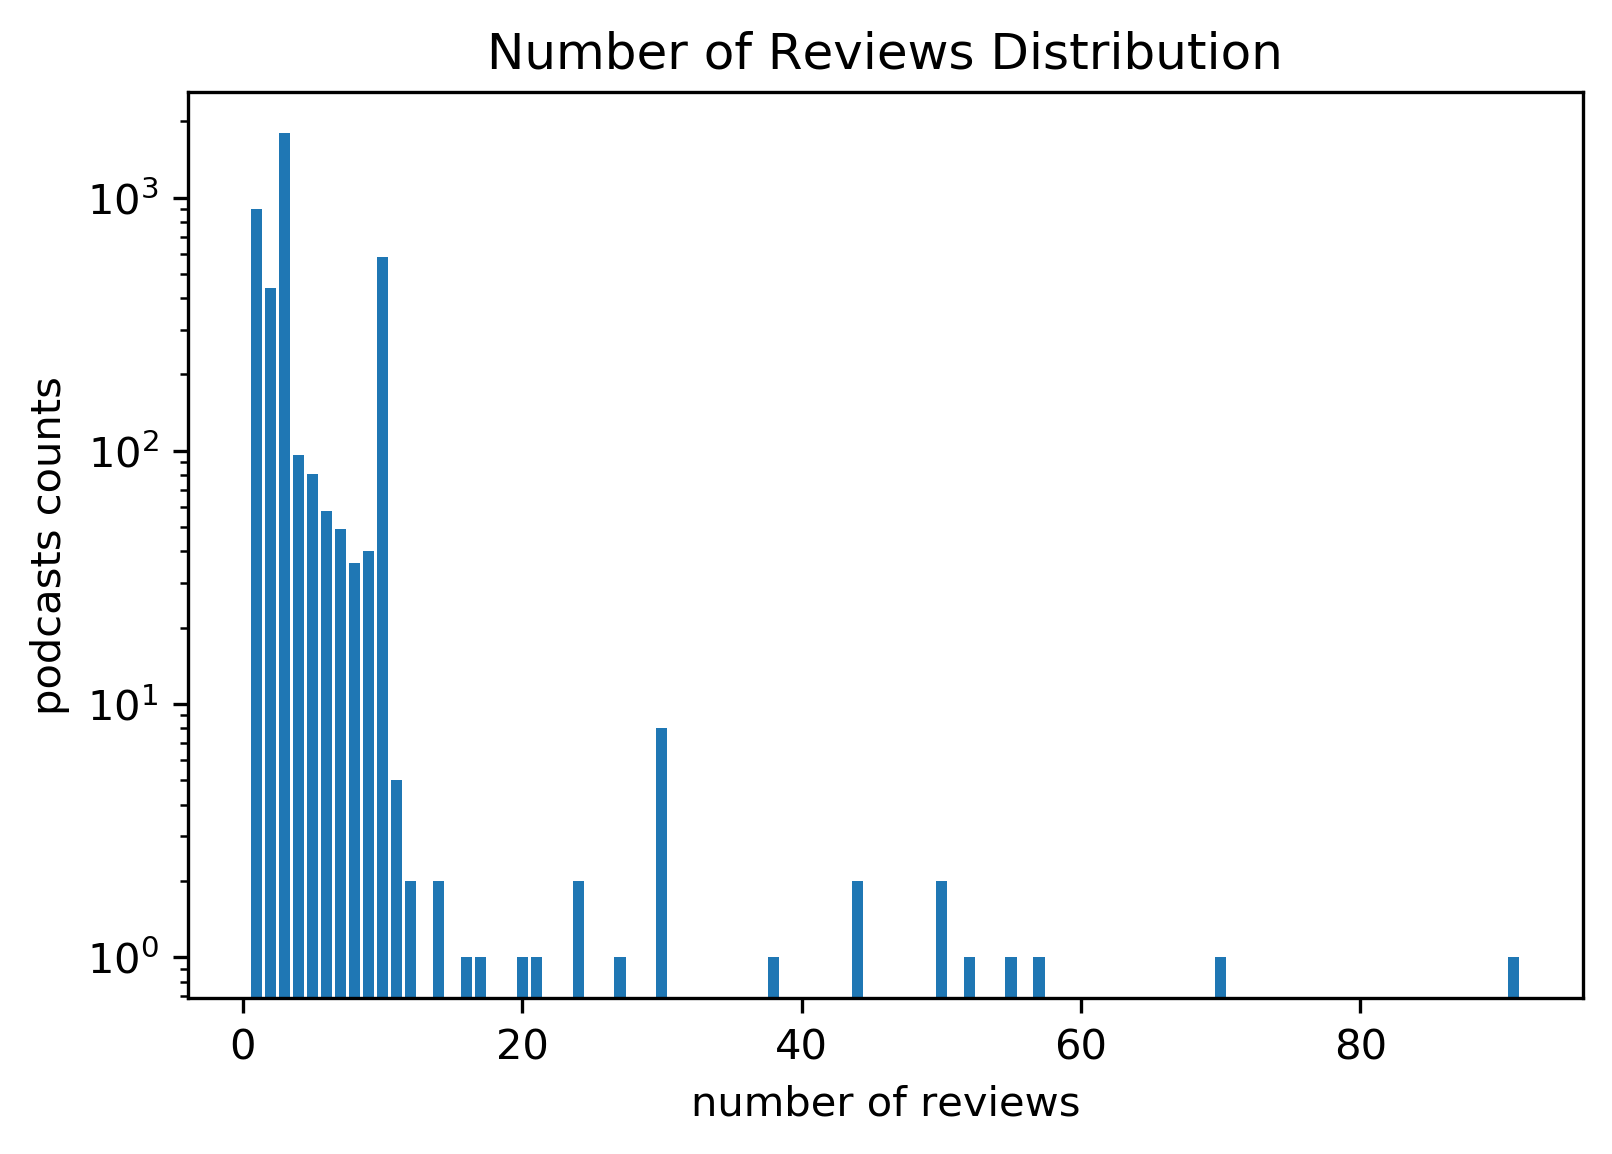

In [ ]:
plt.figure(dpi = 300)
plt.bar(ratingCount, freq, log = True)
plt.title('Number of Reviews Distribution')
plt.xlabel('number of reviews')
plt.ylabel('podcasts counts')

Text(0, 0.5, 'podcasts')

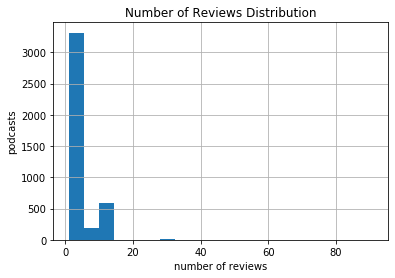

In [ ]:
data_select['ratings_count'].hist(bins = 20)
plt.title('Number of Reviews Distribution')
plt.xlabel('number of reviews')
plt.ylabel('podcasts')

Text(0, 0.5, 'podcasts count')

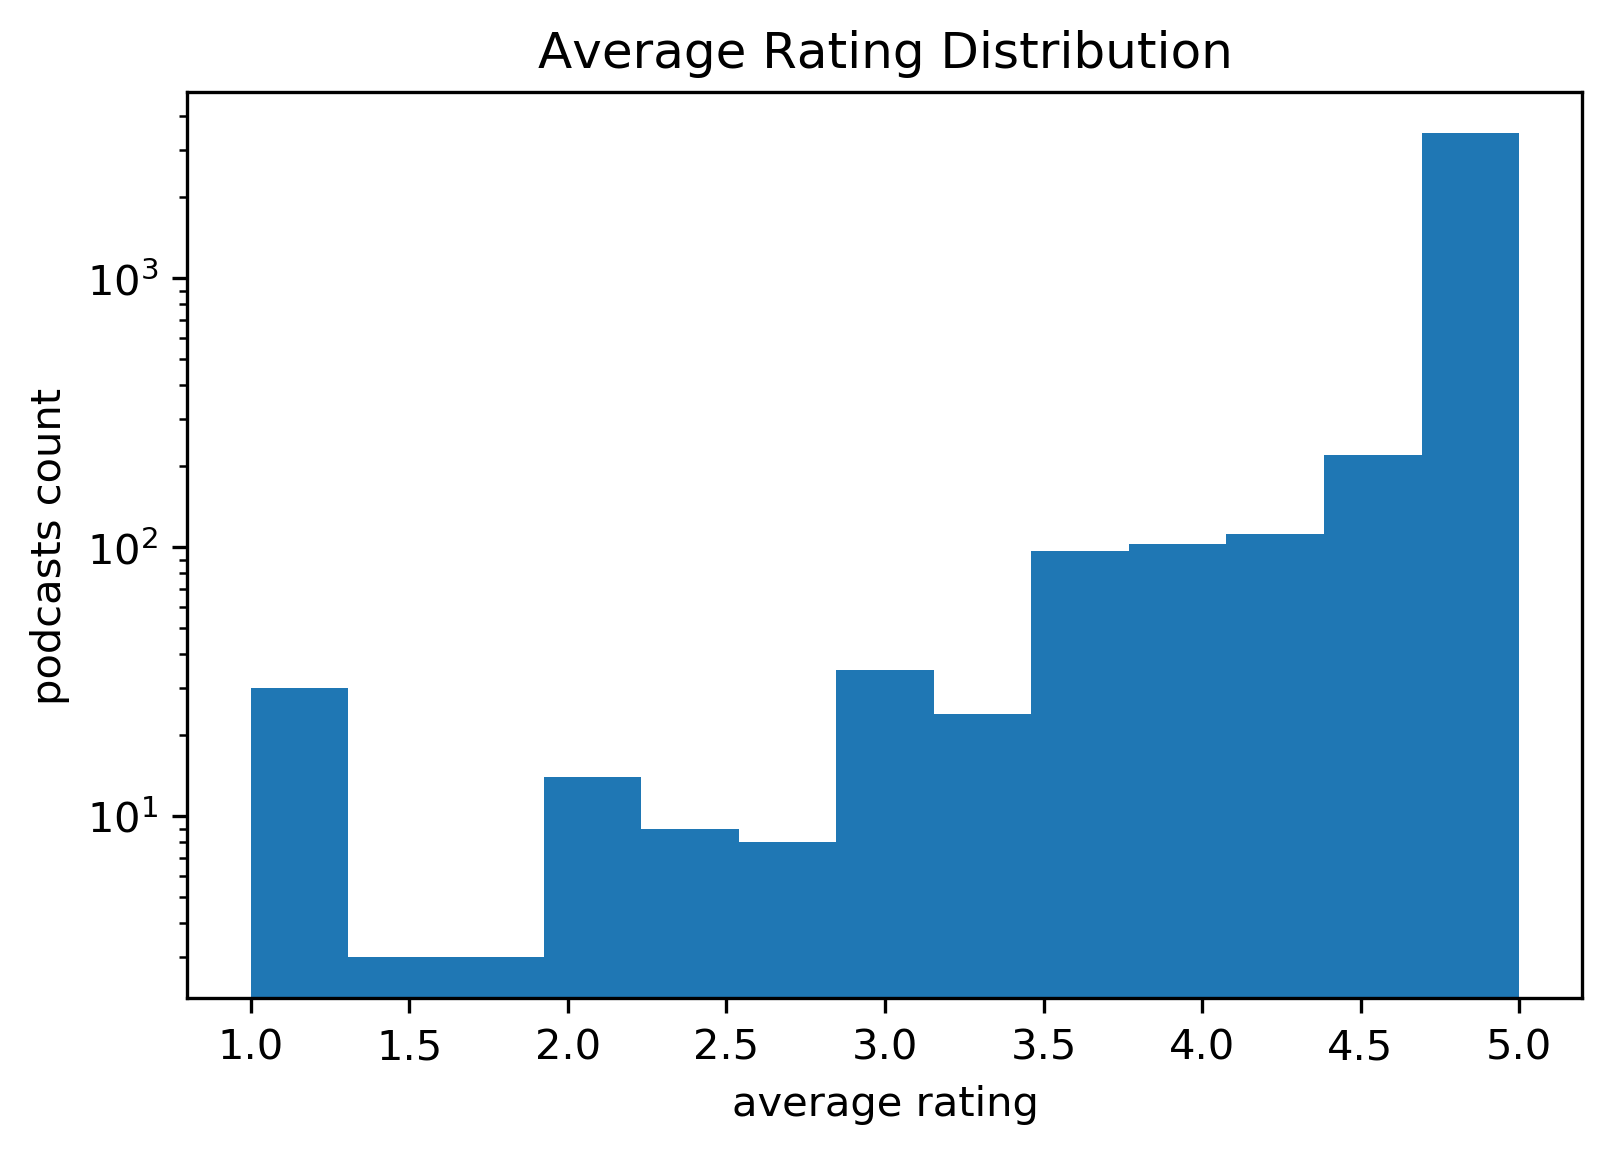

In [ ]:
plt.figure(dpi=300)
plt.hist(data_select['avg_rating'], bins = 13, log = True)
plt.title('Average Rating Distribution')
plt.xlabel('average rating')
plt.ylabel('podcasts count')


In [ ]:
star_to_freq = Counter(list(data_select['star']))

In [ ]:
star_to_freq

Counter({'5': 3617, '4': 372, '2': 29, '3': 67, '1': 30})

In [ ]:
len(data_select.loc[data_review['rating_level'] == 'low'])

136

In [ ]:
len(data_select.loc[data_review['rating_level'] == 'fair'])

658

In [ ]:
len(data_select.loc[data_review['rating_level'] == 'good'])

3321

In [ ]:
len(data_select.loc[data_review['star'] == '3'])

67

In [ ]:
len(data_select.loc[data_review['star'] == '4'])

372

In [ ]:
len(data_select.loc[data_review['star'] == '5'])

3617

## TF-IDF vectorize description

In [ ]:
data_select['description_clean_stem'] = data_select['description'].apply(lambda x : clean_stem(x))

In [ ]:
len(data_select)

4115

In [ ]:
data_select.head()

,name,description,reviews,ratings,reviews_comb,ratings_sum,ratings_count,popularity,avg_rating,rating_level,star,description_clean_stem
7,AbundanCEO,For a womxn on the move -- we're a resource fo...,['I feel like I am friends with them These gir...,"[5, 5, 5, 5]",I feel like I am friends with them These girls...,20,4,good,5.00,good,5,womxn move resourc aspir entrepreneur want liv...
9,Accelerate Your Success with Amanda Tress,This is the Accelerate Your Success podcast wi...,"['Awesome show, highly recommend! Amanda and h...","[5, 5, 5, 5]","Awesome show, highly recommend! Amanda and her...",20,4,good,5.00,good,5,acceler success podcast amanda tressamanda tre...
12,Ace Of Spada:,Getting insight from Fitness People throughout...,['Bringing more knowledge to the fitness game!...,"[5, 5, 5]",Bringing more knowledge to the fitness game! I...,15,3,fair,5.00,good,5,get insight fit peopl throughout worldappli li...
21,AdapNation: all things Self-Optimisation!,All things Self-Optimisation! A deep dive Podc...,['One stop shop There are soo many podcast out...,"[5, 5, 5, 2]",One stop shop There are soo many podcast out t...,17,4,fair,4.25,fair,4,thing selfoptimis deep dive podcast dig practi...
24,Addicted To Fitness Podcast,"Commentary on current nutrition research, fitn...",['ATF covers the 360 of life! I really enjoyed...,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]",ATF covers the 360 of life! I really enjoyed m...,60,12,good,5.00,good,5,commentari current nutrit research fit product...


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_select['description_clean_stem'])
print(X.shape)

(4115, 69255)


In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

## Categorize reviews and sentiment analysis

In [ ]:
nlp = spacy.load("en_core_web_sm")
analyzer = SentimentIntensityAnalyzer()

In [ ]:
doc1 = nlp(clean_stem(Information))
doc2 = nlp(clean_stem(Emotion))
doc3 = nlp(clean_stem(Advertisement))
doc4 = nlp(clean_stem(Audio))

In [ ]:
data_review

,reviews,ratings,reviews_comb,ratings_sum,ratings_count,popularity
0,[''],[0],,0,1,low
1,[''],[0],,0,1,low
2,[''],[0],,0,1,low
3,[''],[0],,0,1,low
4,[''],[0],,0,1,low
5,[''],[0],,0,1,low
6,[''],[0],,0,1,low
7,['I feel like I am friends with them These gir...,"[5, 5, 5, 5]",I feel like I am friends with them These girls...,20,4,low
8,[''],[0],,0,1,low
9,"['Awesome show, highly recommend! Amanda and h...","[5, 5, 5, 5]","Awesome show, highly recommend! Amanda and her...",20,4,low


In [ ]:
#df_tmp = data_review.loc[0:1999].copy()
data_select['vector'] = data_select['reviews_comb'].apply(lambda x : split_vect(x))

[4.3903 0.7351 0.     0.    ]
[3.4906 0.802  0.     0.    ]
[0.8952 0.     0.     0.    ]
[7.6823 0.5004 1.3212 0.    ]
[9.2341 0.6249 2.749  0.9068]
[6.7004 0.3538 0.4926 0.    ]
[1.8902 0.2263 0.     0.    ]
[10.9655  1.726   0.      0.    ]
[6.5405 0.     0.     0.    ]
[7.4809 0.4079 0.     0.    ]
[5.8806 0.9721 0.     0.    ]
[4.2198 0.     1.7015 0.6319]
[4.0937 1.9408 0.     0.    ]
[0.9441 0.4754 0.8779 0.    ]
[3.0573 0.4404 0.     0.    ]
[1.8993 0.     0.     0.    ]
[5.1504 0.     0.4215 0.    ]
[4.4082 0.     0.     0.    ]
[1.6961 1.6993 0.     0.    ]
[4.8547 0.6249 0.     0.    ]
[2.3907 0.     0.     0.6808]
[7.6956 1.2433 0.     0.    ]
[0.453 0.    0.    0.   ]
[7.0741 0.     0.8715 0.    ]
[3.5217 0.     0.     0.    ]
[11.549   0.7276  0.      0.    ]
[0.895 0.    0.    0.   ]
[9.3587 1.7339 0.4588 0.5106]
[6.0515 1.5264 0.     0.8832]
[5.3302 0.658  1.2523 0.    ]
[0.1724 0.0258 0.     0.    ]
[8.6938 0.0516 0.     0.    ]
[2.2355 0.     0.     0.    ]
[0.95 0.  

[ 6.0459  1.1581 -0.4767  0.    ]
[0.7959 0.     0.     0.4877]
[0.8841 0.     0.     0.    ]
[-0.1212  0.      0.2617  0.    ]
[0.     0.9329 0.     0.    ]
[1.468  0.     0.6996 0.4588]
[0.     0.9246 0.6908 0.    ]
[-0.3182  0.      0.      0.    ]
[1.4491 0.     0.     0.    ]
[2.3662 0.     0.     0.    ]
[1.4491 0.     0.     0.    ]
[2.3662 0.     0.     0.    ]
[3.0663 0.6369 0.875  0.    ]
[0.6249 0.     0.6124 0.    ]
[1.2738 0.4215 2.0705 0.    ]
[0.8122 0.     1.3972 0.    ]
[6.4743 0.     1.1811 0.    ]
[2.4778 0.8979 0.     0.    ]
[6.5703 1.6308 0.     0.    ]
[5.984  0.3818 0.     0.    ]
[9.9059 0.2732 0.     0.    ]
[0.7262 0.     0.     0.    ]
[6.834  1.7462 0.     0.4019]
[0.9801 0.     0.     0.    ]
[12.0017  1.5547  0.     -0.1531]
[14.4335  0.0772  0.      0.    ]
[0.8555 0.     0.     0.    ]
[3.531 0.    0.    0.   ]
[4.1508 0.     0.     0.    ]
[11.4379  1.8029  1.4811  0.    ]
[7.2056 1.6871 0.     2.966 ]
[6.7365 1.686  0.8555 0.    ]
[0.9237 0.     0.   

[9.0782 3.2491 0.     0.    ]
[ 5.8641  0.5106 -0.296   0.8478]
[0.9359 0.6478 0.     0.    ]
[2.2397 0.9813 0.     0.    ]
[ 0.5364  0.4404  0.     -0.7906]
[0.9147 0.     0.     0.    ]
[2.8496 1.1742 0.6369 0.    ]
[5.9232 2.5404 0.6369 0.91  ]
[0.9077 0.     0.     0.    ]
[0.5983 0.     0.9152 0.    ]
[1.7422 0.     0.     0.    ]
[0.9704 0.     0.     0.    ]
[5.7763 0.8613 0.     0.    ]
[ 0.     -0.4939  0.      0.    ]
[6.1206 0.     0.     0.5222]
[1.6884 0.     0.     0.    ]
[0.6249 0.9136 0.     0.    ]
[0.6892 0.     0.     0.    ]
[0. 0. 0. 0.]
[0.6369 0.     0.     0.    ]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0.9358 0.     0.     0.    ]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0.9001 0.     0.     0.    ]
[0.9466 0.7783 1.2843 0.    ]
[4.7252 0.9593 0.0772 0.    ]
[0.     0.9651 0.     0.    ]
[ 0.6114 -0.8338  0.      0.    ]
[10.6646  0.      1.6465  0.    ]
[6.9974 0.     0.     0.    ]
[4.3573 0.9761 0.     0.2716]
[0.4404 0.     0.0951 0.    ]
[0. 0. 0. 0.]
[8.0716 1.21

[3.2873 0.     0.     0.    ]
[8.8388 2.7815 0.     0.    ]
[3.1675 0.5562 0.     0.    ]
[1.5199 0.     1.284  0.    ]
[7.5867 1.2203 0.5267 0.    ]
[10.4041  0.886   0.2732  0.5399]
[0.6114 0.     0.     0.    ]
[ 9.0771  1.6116 -0.1027  0.    ]
[5.3947 0.     0.     0.    ]
[2.3778 0.     0.6705 0.    ]
[0.    0.    0.465 0.   ]
[0.8339 0.     0.5859 0.    ]
[1.5993 0.     0.     0.    ]
[0.4251 0.     0.8074 0.    ]
[1.0021 0.8126 0.6249 0.    ]
[ 1.8349 -0.0572  0.      0.    ]
[ 8.8551 -0.1507  0.      0.    ]
[0. 0. 0. 0.]
[1.426 0.    0.    0.   ]
[0.4223 0.     0.     0.    ]
[1.5379 0.8957 0.296  0.    ]
[1.8975 0.7579 0.5106 0.4767]
[0.2003 0.8475 0.     0.    ]
[2.047  0.     0.2732 0.    ]
[4.4566 0.     0.     0.    ]
[1.5252 0.     0.6705 0.    ]
[0.4867 0.     0.3804 0.    ]
[2.6694 0.     0.     0.    ]
[0.     0.9578 0.9324 0.    ]
[3.125  0.4404 0.8808 0.    ]
[2.5448 0.     0.     0.5719]
[19.5431  1.1744  5.5419  0.    ]
[11.658   0.5173  0.      0.    ]
[1.5109 2.

[0.3612 0.25   0.     0.    ]
[4.8544 0.1585 0.     1.2121]
[2.4969 0.4818 0.     0.    ]
[4.516  2.9366 0.2244 0.8257]
[0.9523 0.     0.     0.    ]
[10.3202  0.6124  0.      0.    ]
[5.0431 0.     0.7184 0.    ]
[1.6716 0.0772 0.     0.    ]
[0.7003 0.     0.     0.    ]
[ 7.9     0.8166  0.     -0.4767]
[7.0798 2.467  0.8934 0.8481]
[0.9749 0.     0.     0.    ]
[1.8752 0.     0.4767 0.    ]
[11.0568 -0.0738  0.      0.    ]
[-0.7713  0.      0.      0.    ]
[0. 0. 0. 0.]
[-0.1531  0.      0.      0.    ]
[5.7365 1.7937 0.     0.    ]
[2.805 0.    0.    0.   ]
[4.8949 0.1129 0.8885 0.    ]
[0.3182 0.     0.     0.4767]
[0.1027 0.762  0.     0.    ]
[0. 0. 0. 0.]
[3.4934 1.4701 0.5676 0.4767]
[7.3437 1.492  0.     0.8846]
[3.8871 0.7574 0.     0.    ]
[0.8774 0.     0.     0.    ]
[4.6528 1.7112 0.     0.    ]
[1.4864 0.     0.     0.    ]
[ 8.9382  3.3697 -0.4215  0.4385]
[3.1462 0.2263 0.5267 0.    ]
[8.7231 0.8625 0.6249 0.    ]
[0.7574 0.     0.     0.    ]
[2.3701 0.     0.     

[0. 0. 0. 0.]
[0.6249 0.     0.     0.    ]
[0.8975 0.4841 0.     0.    ]
[0.5622 0.     0.     0.    ]
[0.     0.5859 0.     0.    ]
[1.2738 0.44   0.     0.    ]
[0.4019 0.     0.     0.    ]
[0. 0. 0. 0.]
[0.5927 1.0059 0.     0.    ]
[0.8975 0.     0.     0.    ]
[0.9648 0.     0.7096 0.3612]
[8.9423 1.7685 1.1185 0.    ]
[1.613 0.    0.    0.   ]
[2.4637 0.     0.     0.    ]
[1.2715 0.     0.     0.    ]
[1.4093 0.     0.4926 0.    ]
[1.0327 0.     0.9515 0.    ]
[2.0936 0.9062 0.     0.    ]
[1.6413 0.     0.     0.    ]
[0.     0.9274 0.3936 0.    ]
[1.3047 0.     0.     0.    ]
[10.5915  0.      0.1779  0.4404]
[0.5267 0.8591 0.9062 0.    ]
[0.9422 0.     0.     0.    ]
[0.     1.7125 0.     0.    ]
[0.     0.891  0.4215 1.6762]
[0.     0.4927 0.     0.    ]
[ 0.6435 -0.6369  0.      0.    ]
[0.8309 0.     0.     0.    ]
[3.125  0.4404 0.8808 0.    ]
[0.    0.    0.    0.886]
[0.1091 0.     0.9136 0.    ]
[1.7686 0.     0.     0.    ]
[4.3008 0.     0.     0.    ]
[0.5711 0.  

[0. 0. 0. 0.]
[1.684  0.4404 0.8316 0.    ]
[7.6742 1.3092 1.0464 0.7269]
[0.6124 0.368  1.6222 0.    ]
[0.816 0.    0.    0.   ]
[ 0.25   -0.6676  0.4404  0.    ]
[0.7184 0.7897 1.6453 0.    ]
[0. 0. 0. 0.]
[2.0453 0.     0.8442 0.    ]
[0.     0.     1.0275 0.    ]
[2.3352 0.     0.     0.    ]
[0.6588 0.     0.     0.    ]
[1.6118 0.     0.     0.    ]
[1.6118 0.     0.     0.    ]
[11.298  0.     0.     0.   ]
[0. 0. 0. 0.]
[1.6787 0.     0.4404 0.    ]
[0. 0. 0. 0.]
[6.0925 0.     0.802  0.    ]
[ 0.8979 -0.296   0.      0.8061]
[0.6588 0.     0.6808 0.    ]
[2.7515 0.1136 0.2319 0.5106]
[2.8799 0.8122 0.     0.    ]
[2.1728 0.     0.     0.    ]
[-0.5229  0.      0.7671  0.    ]
[-0.3412  0.      0.      0.    ]
[-0.502  0.     0.     0.   ]
[0.6249 0.     0.     0.    ]
[1.6615 0.     0.4588 0.    ]
[0.6486 0.4215 1.1915 0.    ]
[-1.2743  0.7418  0.      0.    ]
[0.9678 0.0534 0.     0.    ]
[-1.5435  0.      0.      0.    ]
[ 0.     -0.3071  0.6892  0.    ]
[1.666 0.    0.    0

[3.1271 0.     0.     0.    ]
[0.     0.5106 0.     0.    ]
[0.5244 0.     0.     0.    ]
[0. 0. 0. 0.]
[0.7845 1.0948 0.9981 0.4019]
[9.0273 0.659  1.3178 0.8451]
[1.7417 0.     0.     0.    ]
[1.6377 0.     0.     0.    ]
[0.4927 0.8655 0.     0.    ]
[0. 0. 0. 0.]
[1.6873 0.     0.4939 0.    ]
[1.7972 0.     0.     0.    ]
[ 2.8795  1.638   0.1531 -0.34  ]
[2.3108 0.4574 0.     0.6249]
[0.8398 0.     0.     0.    ]
[8.025  1.2465 0.     0.    ]
[0.9035 0.     0.     0.    ]
[0.6083 0.     0.     0.    ]
[2.9494 0.296  0.8885 0.    ]
[2.2731 0.     0.     0.    ]
[0.8353 0.5106 0.     0.2023]
[1.8215 0.7003 0.7845 0.    ]
[ 1.2237  0.     -0.0263  0.    ]
[3.4133 0.25   0.     0.    ]
[0. 0. 0. 0.]
[0.9285 0.     0.     0.    ]
[0.     0.5859 0.     0.    ]
[1.4026 0.     0.296  0.    ]
[0.8353 0.     0.     0.    ]
[0. 0. 0. 0.]
[1.3914 0.     0.     0.    ]
[1.1566 0.     1.2756 0.    ]
[0.9185 0.     0.6705 0.    ]
[0. 0. 0. 0.]
[0.6504 0.7506 0.     0.    ]
[0.6696 0.     0.     

[0.765  0.3252 0.     0.    ]
[0.6696 0.8646 0.5267 0.    ]
[0.6908 0.     0.     0.    ]
[0.     0.2023 0.     0.    ]
[11.4527  1.5889  0.9509  2.0676]
[0.2942 0.     0.     0.    ]
[2.7738 0.     0.     0.    ]
[0.8221 0.9299 0.4019 0.25  ]
[0. 0. 0. 0.]
[2.293 0.743 0.    0.   ]
[-0.296  0.     0.     0.   ]
[1.5868 0.     0.     0.    ]
[0. 0. 0. 0.]
[0.836  0.     0.8126 0.6908]
[0. 0. 0. 0.]
[0.7777 0.1027 0.     0.    ]
[0.7088 0.7783 0.     0.    ]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0.2654 0.     0.     0.    ]
[2.9651 0.7088 0.     0.    ]
[2.3593 0.6115 0.     0.    ]
[0. 0. 0. 0.]
[2.8231 0.872  0.836  0.    ]
[2.5199 0.     0.4588 0.    ]
[2.5493 0.     0.     0.    ]
[0. 0. 0. 0.]
[ 1.1701  0.802   0.5267 -0.2023]
[ 0.2951  0.2732 -0.6908  0.    ]
[ 2.4485  0.     -0.25    0.    ]
[2.6544 0.     0.8553 0.    ]
[2.9801 0.     0.     0.    ]
[3.0793 0.     0.     0.    ]
[0.   0.34 0.   0.  ]
[-0.2732  0.      0.      0.    ]
[0.     0.5574 0.     0.    ]
[2.4716 1.

[0.906  0.7418 0.     0.    ]
[0.     0.8689 0.     0.6124]
[11.9887 -0.1302  0.      0.    ]
[1.767  0.8176 0.     0.    ]
[0.8906 0.7184 0.296  0.5859]
[0.5538 0.     0.     0.    ]
[0.9533 0.     0.296  0.    ]
[8.8428 0.6808 0.     0.5106]
[0.8992 0.4404 0.     0.    ]
[2.2613 0.4445 0.     0.    ]
[0. 0. 0. 0.]
[5.016 0.    0.    0.   ]
[9.6271 1.6892 0.7649 1.3539]
[7.0356 3.7675 0.     0.5326]
[4.3806 0.8316 0.     0.    ]
[2.4946 0.5267 0.     0.    ]
[11.1048  1.8178  0.8807  0.    ]
[3.3141 0.6335 0.     0.    ]
[6.3618 0.     0.     0.    ]
[15.4882  1.7734  0.      0.    ]
[9.3433 0.8897 0.     0.    ]
[9.7658 0.3188 0.     0.    ]
[9.1221 0.     2.3455 0.7717]
[0.796  0.4404 0.     0.    ]
[2.5025 0.     0.     0.    ]
[0.983 0.    0.    0.   ]
[1.9308 0.     0.     0.    ]
[5.4385 1.317  0.     0.6249]
[5.4385 1.317  0.     0.6249]
[ 9.3981  1.2363  0.9343 -0.2023]
[4.2291 0.     0.     0.    ]
[4.7844 0.     0.     0.    ]
[11.0116  2.5659  0.      0.    ]
[1.3478 0.    

[ 4.7211 -0.1371  0.      0.    ]
[ 6.757   1.3959  0.6908 -0.4019]
[8.4815 0.25   0.6682 0.8221]
[3.4821 3.8528 0.     1.5144]
[6.127  0.386  0.     0.5859]
[4.516  2.9366 0.2244 0.8257]
[5.6936 0.8275 0.     0.    ]
[8.2983 0.9062 0.     0.    ]
[-0.429   0.      1.1861  0.    ]
[2.6888 0.     0.     0.    ]
[0.1237 0.     0.4939 0.    ]
[12.0637  0.7707  0.      0.4588]
[1.5361 0.     0.     0.    ]
[1.5904 0.     0.     0.875 ]
[0.8519 0.7269 0.8588 0.    ]
[0.6997 0.     1.604  0.    ]
[2.4759 0.     0.     0.    ]
[ 3.8432  0.     -0.0258  0.    ]
[1.2879 1.5094 0.     0.    ]
[11.2721  1.6418  0.      0.    ]
[0.9714 0.9102 0.     0.    ]
[2.1021 0.     0.3612 0.    ]
[-0.5994  0.      0.      0.    ]
[1.6145 0.     0.296  0.    ]
[0.9656 0.8834 0.     0.    ]
[2.4352 0.     0.3612 0.    ]
[12.7793  2.5546  1.7498  0.    ]
[0.3362 0.     0.7351 0.    ]
[0.8652 0.     0.5859 0.    ]
[0.4404 0.     0.     0.    ]
[1.7271 0.     0.4019 0.    ]
[0.     0.     0.7901 0.    ]
[1.2537 

[0.4939 0.     0.5904 0.    ]
[1.3976 0.     0.     0.    ]
[8.2912 0.4019 0.9516 0.    ]
[0.     0.     0.4588 0.6879]
[8.9766 1.1636 0.6369 0.8222]
[2.3848 0.     0.     0.3182]
[13.5896  2.9337  0.1027  0.    ]
[13.5896  2.9337  0.1027  0.    ]
[0.4199 0.8398 0.     0.    ]
[8.3916 1.7416 1.7247 0.5095]
[5.4323 0.7717 0.9611 0.    ]
[0.4199 0.2023 0.     0.    ]
[ 0.2023 -0.2415  0.      0.    ]
[7.7315 1.3873 0.     0.    ]
[7.5969 1.6765 2.0075 0.8977]
[5.6773 0.     0.     0.0772]
[3.8298 0.     0.     0.8622]
[1.3228 0.     0.     0.    ]
[13.5379  0.      1.5585  0.    ]
[0.807 0.    0.    0.   ]
[0.5106 0.4019 0.624  0.    ]
[2.5786 0.     0.     0.7906]
[2.6796 1.9714 0.     0.    ]
[1.4735 0.711  0.6705 0.    ]
[ 7.6935 -1.437   0.      0.    ]
[0.     0.     0.     0.9442]
[2.4161 2.4518 0.     0.    ]
[4.7119 1.3427 0.3818 0.7136]
[2.3684 1.9729 0.9081 0.    ]
[0.     0.     0.     0.8885]
[3.2643 0.     0.6369 0.    ]
[2.6788 0.     0.     0.    ]
[6.6405 2.2763 0.     0.

[ 0.     -0.2755  0.      0.    ]
[0. 0. 0. 0.]
[1.0929 0.     0.     0.    ]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[2.8578 0.     0.     0.    ]
[2.0291 0.     0.     0.    ]
[0.     0.     0.7269 0.    ]
[0.9165 0.9483 0.     0.    ]
[2.7993 0.7906 0.     0.    ]
[1.4512 0.     0.     0.    ]
[1.5752 0.     0.     0.6369]
[-0.3628  0.4215  0.      0.    ]
[8.915  1.1001 0.     0.765 ]
[0.8957 1.515  0.1531 0.    ]
[1.4922 0.     0.4389 0.    ]
[0.5106 0.     0.     0.    ]
[0.6588 0.     1.0629 0.    ]
[1.5587 0.8126 0.     0.    ]
[0.9514 0.     0.     0.    ]
[0.7163 0.7915 0.     0.    ]
[1.9128 0.     0.765  0.    ]
[3.7775 0.     0.     0.8779]
[2.3218 0.     0.     0.    ]
[1.2272 0.8268 1.6554 0.    ]
[0.     0.     0.4404 0.    ]
[0. 0. 0. 0.]
[1.5071 0.     1.1592 0.    ]
[0.8478 0.     0.     0.    ]
[0.8213 0.     0.     0.    ]
[6.6624 0.     0.5267 0.    ]
[0.8585 0.     0.     0.    ]
[4.5631 0.     0.     0.    ]
[4.121  1.1036 0.     0.    ]
[4.3824 1.1036 0.     0.    ]
[0.   

[1.665  0.4404 0.4404 0.    ]
[6.1673 3.2405 2.6956 0.4404]
[0.4939 0.     0.5904 0.    ]
[ 0.7675  0.6403 -0.296   0.    ]
[0.     0.6588 0.     0.    ]
[0.6114 0.     0.9673 0.    ]
[0. 0. 0. 0.]
[0.8689 0.     0.     0.    ]
[1.5704 0.     0.743  0.    ]
[ 0.0258  0.5595 -0.3182  0.    ]
[2.8672 0.     0.     0.    ]
[0. 0. 0. 0.]
[0.9582 0.8777 0.     0.4767]
[ 4.6153 -0.3166  0.      0.4404]
[0.8313 0.     0.     0.    ]
[0.4199 0.     0.     0.    ]
[0.6249 0.     0.     0.    ]
[0.9524 0.     0.     0.    ]
[0.725 0.    0.    0.   ]
[0.9151 0.     0.2732 0.5423]
[0.     0.     0.5423 0.    ]
[2.4483 0.3182 0.     0.8225]
[-0.4767  0.      0.      0.    ]
[ 0.      0.     -0.3818  0.    ]
[0.8877 0.     0.     0.    ]
[0.8172 0.     0.     0.    ]
[0.9042 0.     0.     0.    ]
[0.8481 0.     0.     0.    ]
[0.6249 0.     0.     0.    ]
[2.4637 0.     0.     0.3818]
[1.1308 0.     0.     0.    ]
[0.5105 0.     0.     0.    ]
[0.6249 0.     0.     0.    ]
[0.8658 0.     0.     0.  

[0.564  0.     0.     0.9022]
[12.8819  0.624   0.      0.5719]
[6.9389 0.3759 0.     0.5719]
[1.5849 0.     0.     0.    ]
[7.3709 0.     1.2363 0.    ]
[3.2486 0.8126 0.     0.2716]
[5.0398 0.     0.5267 0.    ]
[4.1077 1.773  1.7206 0.6369]
[1.9256 0.     0.     0.    ]
[0.8675 0.9136 0.4019 0.    ]
[3.3275 0.3409 0.     0.    ]
[-0.0258  0.      0.749   0.    ]
[2.2417 0.9097 0.     0.5251]
[3.4212 1.7841 0.     0.    ]
[6.2044 0.3544 0.     0.    ]
[2.3537 0.4404 0.     0.3817]
[ 2.3402  1.8296 -0.7506  0.9512]
[1.7302 0.     0.     0.    ]
[5.7382 1.1425 0.4588 0.6249]
[0.902  0.7227 0.     0.    ]
[0.933 0.    0.    0.   ]
[3.0658 0.4902 0.     0.2924]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0.     0.2023 0.     0.    ]
[0.6369 0.     0.     0.    ]
[4.3769 0.9895 0.     0.6249]
[0.3612 0.     0.9081 0.2263]
[ 0.     -0.4767  0.      0.    ]
[0.     0.4404 0.     0.4404]
[0. 0. 0. 0.]
[ 0.      0.     -0.6879  0.6369]
[ 0.5081  0.     -0.1201  0.    ]
[ 0.3615 -0.6249  0.      0.5719]
[ 0.

In [ ]:
data_select

In [ ]:
data_select

,name,description,reviews,ratings,reviews_comb,ratings_sum,ratings_count,popularity,avg_rating,rating_level,star,description_clean_stem,vector
7,AbundanCEO,For a womxn on the move -- we're a resource fo...,['I feel like I am friends with them These gir...,"[5, 5, 5, 5]",I feel like I am friends with them These girls...,20,4,good,5.00,good,5,womxn move resourc aspir entrepreneur want liv...,"[4.3903, 0.7351, 0.0, 0.0]"
9,Accelerate Your Success with Amanda Tress,This is the Accelerate Your Success podcast wi...,"['Awesome show, highly recommend! Amanda and h...","[5, 5, 5, 5]","Awesome show, highly recommend! Amanda and her...",20,4,good,5.00,good,5,acceler success podcast amanda tressamanda tre...,"[3.4905999999999997, 0.802, 0.0, 0.0]"
12,Ace Of Spada:,Getting insight from Fitness People throughout...,['Bringing more knowledge to the fitness game!...,"[5, 5, 5]",Bringing more knowledge to the fitness game! I...,15,3,fair,5.00,good,5,get insight fit peopl throughout worldappli li...,"[0.8952000000000001, 0.0, 0.0, 0.0]"
21,AdapNation: all things Self-Optimisation!,All things Self-Optimisation! A deep dive Podc...,['One stop shop There are soo many podcast out...,"[5, 5, 5, 2]",One stop shop There are soo many podcast out t...,17,4,fair,4.25,fair,4,thing selfoptimis deep dive podcast dig practi...,"[7.682300000000001, 0.5004, 1.3212000000000002..."
24,Addicted To Fitness Podcast,"Commentary on current nutrition research, fitn...",['ATF covers the 360 of life! I really enjoyed...,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]",ATF covers the 360 of life! I really enjoyed m...,60,12,good,5.00,good,5,commentari current nutrit research fit product...,"[9.2341, 0.6249, 2.7490000000000006, 0.9068]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,Integrative Wellness Radio,Elevating and Evolving how healthcare is being...,"['Listening in St. Paul, MN! Thank you for you...","[5, 5, 5, 5, 2, 5, 5, 5, 4, 5]","Listening in St. Paul, MN! Thank you for your ...",46,10,good,4.60,fair,5,elev evolv healthcar done deserv better doctor...,"[11.297999999999998, 0.0, 0.0, 0.0]"
9986,Intensive Care Network Podcasts,Podcasts on topics relevant to intensive care ...,"['Very practical Great podcasts , pretty much ...",[4],"Very practical Great podcasts , pretty much th...",4,1,fair,4.00,fair,4,podcast topic relev intens care medicin oli fl...,"[0.9411, 0.0, 0.0, 0.0]"
9990,INTERLUDE,A diagnosis of cancer is life changing. We spe...,['Highly recommended! The podcast is an accura...,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]",Highly recommended! The podcast is an accurate...,50,10,good,5.00,good,5,diagnosi cancer life chang spend much time dis...,"[3.3384, 1.1368, 0.3182, 0.3149]"
9991,Intermountain Podcast,Intermountain leaders interviews Intermountain...,"['I’m a fan 100 episodes', 'Makes me think Int...","[5, 5]",I’m a fan 100 episodes Makes me think Intermou...,10,2,fair,5.00,good,5,intermountain leader interview intermountain c...,"[0.7585999999999999, 0.0, 0.0, 0.0]"


In [ ]:
round(2.5)

2

## Description TF-IDF vector and review vector concatenate

In [ ]:
X.shape

(4115, 69255)

In [ ]:
tfidf_vector = X.toarray()

In [ ]:
tfidf_vector.shape

(4115, 69255)

In [ ]:
type(tfidf_vector)

numpy.ndarray

In [ ]:
review_vector = np.array(data_select['vector'].values.tolist())

In [ ]:
review_vector.shape

(4115, 4)

In [ ]:
type(review_vector)

numpy.ndarray

In [ ]:
concat_vector = np.concatenate((tfidf_vector, review_vector), axis = 1)

In [ ]:
concat_vector.shape

(4115, 69259)

In [ ]:
concat_vector

array([[0.    , 0.    , 0.    , ..., 0.7351, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.802 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.8126],
       [0.    , 0.    , 0.    , ..., 0.2665, 0.8153, 0.4019],
       [0.    , 0.    , 0.    , ..., 0.8651, 0.6458, 1.6812]])

In [ ]:
np.savetxt("concat_vector.csv", concat_vector, delimiter=",")

In [ ]:
concat_vector_tmp = np.genfromtxt('concat_vector.csv', delimiter=',')

In [ ]:
concat_vector_tmp == concat_vector

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
len(concat_vector_tmp)

815

In [ ]:
sum(sum(concat_vector_tmp != concat_vector))

0

In [ ]:
type(data_review["rating_level"])

pandas.core.series.Series

In [ ]:
label_vector = np.array(data_select["rating_level"].values.tolist())

In [ ]:
label_vector.shape

(4115,)

In [ ]:
label_vector

array(['low', 'low', 'low', ..., 'good', 'good', 'good'], dtype='<U4')

In [ ]:
np.savetxt("label_vector.csv", label_vector, delimiter=",", fmt=('%s'))

## Modeling -- categorize popularity based on concatenated vectors

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(concat_vector, label_vector, test_size = 0.2)

In [ ]:
indices = range(len(concat_vector))
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(concat_vector, label_vector, indices, test_size = 0.3, random_state = 10)

In [ ]:
len(indices_test)

1235

In [ ]:
type(indices_test)

list

In [ ]:
len(X_test)

1235

### SVM, liner kernel

Confusion Matrix of the model shows that this model performs bad on low ratings prediction.

In [ ]:
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

In [ ]:
svm_model_linear = SVC(kernel = 'linear', C = 1, class_weight = 'balanced').fit(X_train, y_train)

In [ ]:
accuracy = svm_model_linear.score(X_test, y_test)

In [ ]:
accuracy

0.7910931174089069

In [ ]:
y_pred = svm_model_linear.predict(X_test)

Normalized confusion matrix
[[0.14 0.17 0.69]
 [0.02 0.43 0.56]
 [0.   0.11 0.88]]


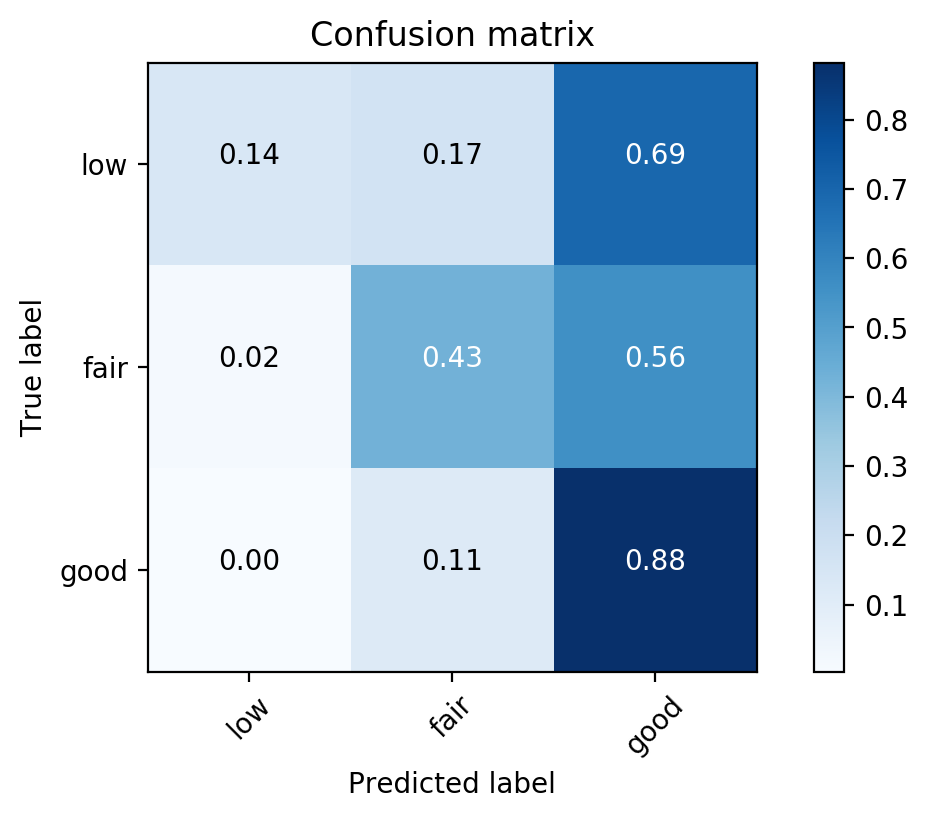

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred, labels = labels)
np.set_printoptions(precision=2)

plt.figure(dpi=200)
plot_confusion_matrix(cm, classes=['low', 'fair', 'good'],
                      title='Confusion matrix', normalize = True)

### SVM, RBF kernel

For the kernel non-linear SVM, to get better performance, need to use grid search to tune the C and gamma parameters, but each train takes a lot of time, we didn't do that.

In [ ]:
svm_model_rbf = SVC(kernel = 'rbf', C = 1, class_weight = 'balanced').fit(X_train, y_train)

In [ ]:
accuracy = svm_model_rbf.score(X_test, y_test)

In [ ]:
accuracy

0.49959514170040487

In [ ]:
y_pred = svm_model_rbf.predict(concat_vector)

Normalized confusion matrix
[[0.8  0.07 0.13]
 [0.19 0.43 0.38]
 [0.28 0.19 0.54]]


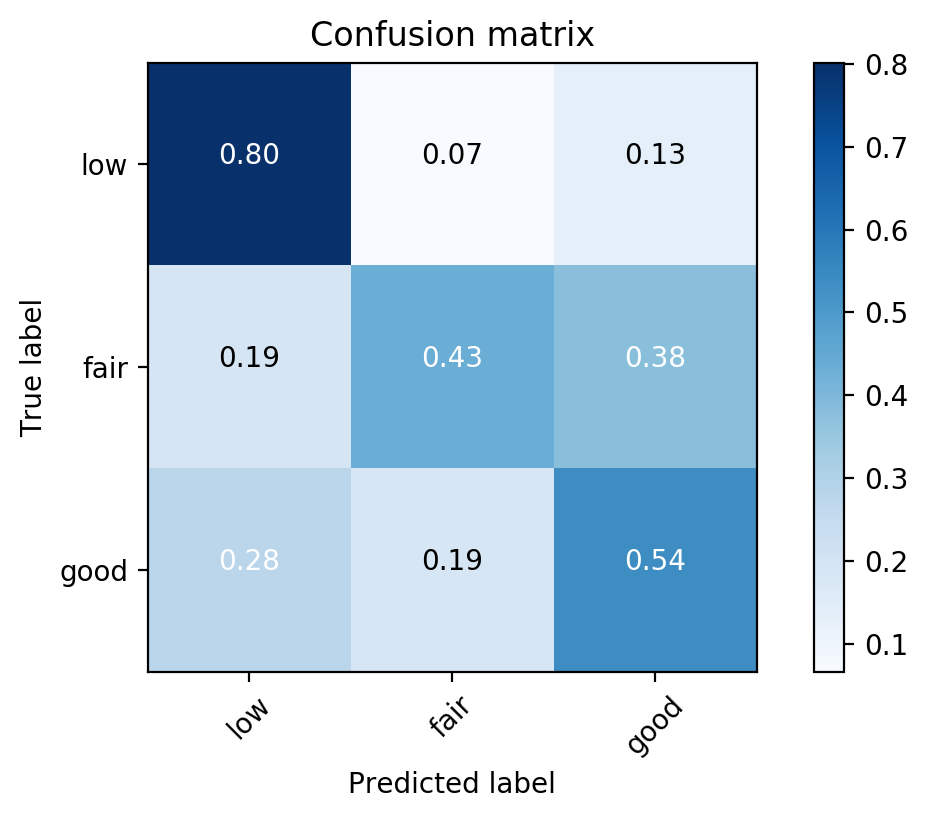

In [ ]:
cm = confusion_matrix(y_true = label_vector, y_pred = y_pred, labels = labels)
np.set_printoptions(precision=2)

plt.figure(dpi=200)
plot_confusion_matrix(cm, classes=['low', 'fair', 'good'],
                      title='Confusion matrix', normalize = True)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(class_weight = 'balanced', n_jobs = -1).fit(X_train, y_train)

In [ ]:
accuracy = lr_model.score(X_test, y_test)

In [ ]:
accuracy

0.7716599190283401

In [ ]:
y_pred = lr_model.predict(concat_vector)

Normalized confusion matrix
[[0.82 0.04 0.14]
 [0.02 0.82 0.16]
 [0.01 0.08 0.91]]


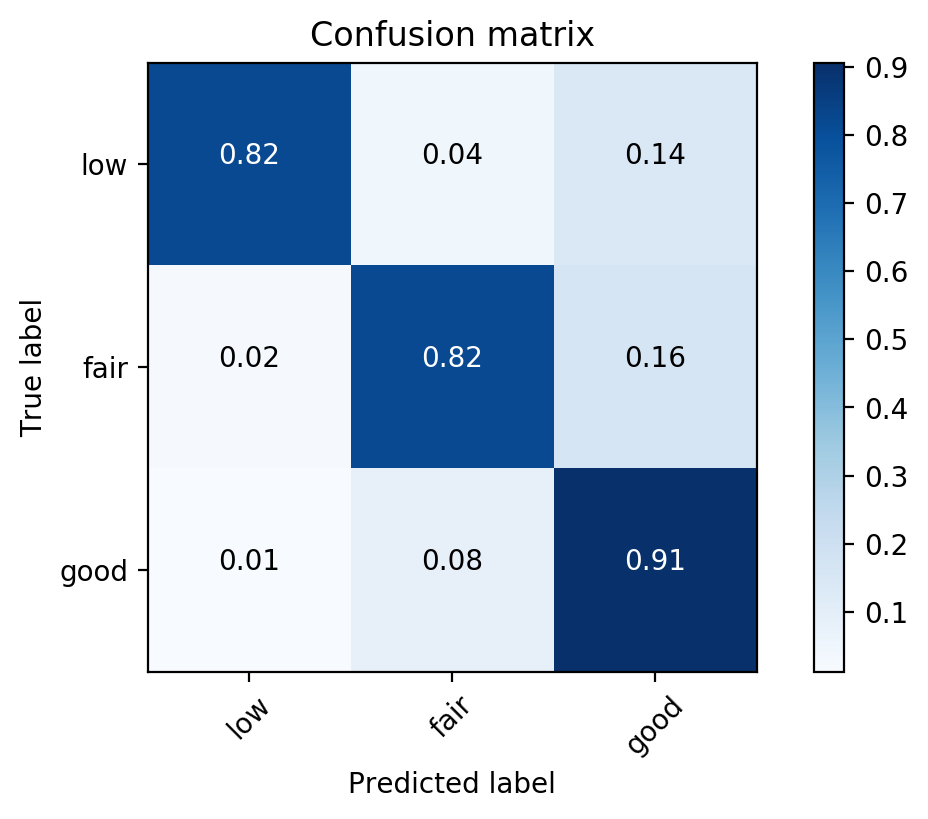

In [ ]:
cm = confusion_matrix(y_true = label_vector, y_pred = y_pred, labels = labels)
np.set_printoptions(precision=2)

plt.figure(dpi=200)
plot_confusion_matrix(cm, classes=['low', 'fair', 'good'],
                      title='Confusion matrix', normalize = True)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(class_weight = 'balanced', n_jobs = -1, random_state = 10).fit(X_train, y_train)

In [ ]:
accuracy = rf_model.score(X_test, y_test)

In [ ]:
accuracy

0.8445344129554656

In [ ]:
y_pred = rf_model.predict(concat_vector)

Normalized confusion matrix
[[7.57e-01 7.35e-03 2.35e-01]
 [3.04e-03 7.67e-01 2.29e-01]
 [3.01e-04 1.51e-03 9.98e-01]]


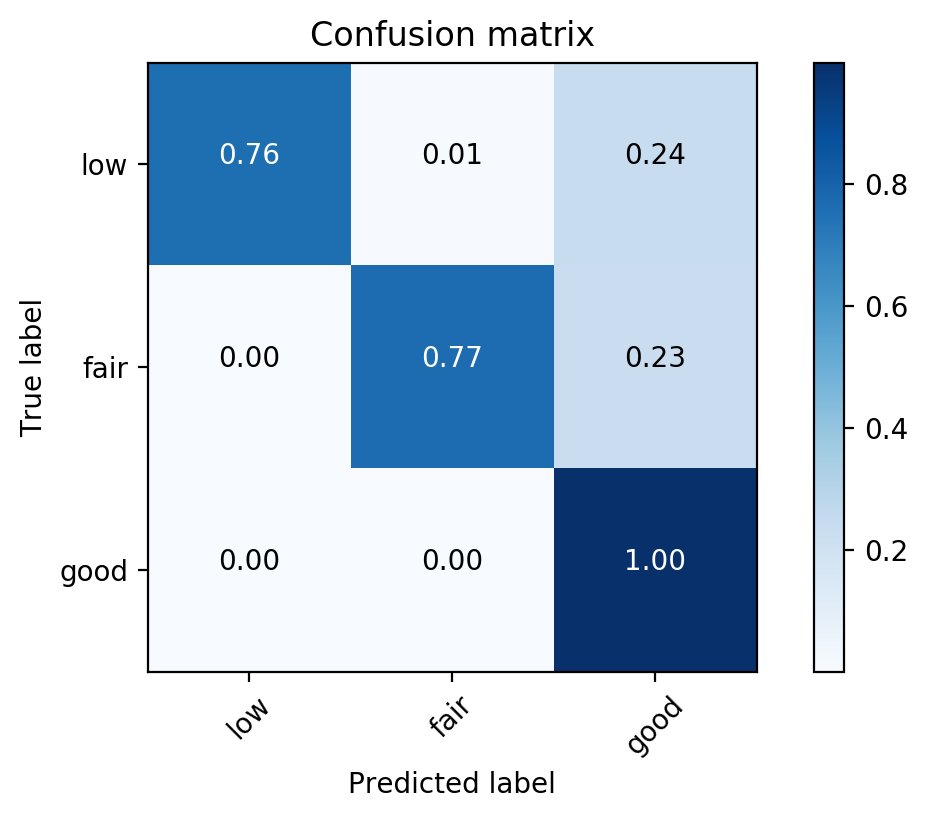

In [ ]:
cm = confusion_matrix(y_true = label_vector, y_pred = y_pred, labels = labels)
np.set_printoptions(precision=2)

plt.figure(dpi=200)
plot_confusion_matrix(cm, classes=['low', 'fair', 'good'],
                      title='Confusion matrix', normalize = True)

## Testing. Input link, output vector, average rating and sentiment scores

In [ ]:
inputLink = 'https://podcasts.apple.com/us/podcast/abundanceo/id1477784794'

In [ ]:
filename = './PodcastProphet/flaskexample/static/model.pkl'
ifdif_filename = './PodcastProphet/flaskexample/static/tfidf.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
loaded_vectorizer = pickle.load(open(ifdif_filename, 'rb'))

In [ ]:
data_description_input = pd.DataFrame(columns = ('name', 'description'))

In [ ]:
url_list = [inputLink]
for i in range(len(url_list)):
    link = url_list[0]
    sauce = requests.get(link)
    soup = bs.BeautifulSoup(sauce.content,'html.parser')
    if soup.find("script", {"class":"ember-view"}):
        soup_json = json.loads(soup.find("script", {"class":"ember-view"}).text)
    else:
        name = ''
        description = ''
        data_description_input.loc[0] = [name, description]
        continue


    # name
    if soup_json['name'] is not None:
        name = soup_json['name']
    else:
        name = ''

    # description
    sub_soup = soup.find("div",{"class":"product-hero-desc"})
    description_tag = sub_soup.find('p')
    if description_tag is not None:
        description = description_tag.text
    else:
        description = ''

    # episode description
    for elem in soup_json['workExample']:
        if elem is not None:
            if 'description' in elem:
                description += ' ' + elem['description']

    data_description_input.loc[0] = [name, description]

In [ ]:
data_review_input = pd.DataFrame(columns = ('reviews', 'ratings'))
browser = webdriver.Chrome("/Users/ziyingfeng/Dropbox/insight/chromedriver")

In [ ]:
url_list = [inputLink]
link = url_list[0]
sauce = requests.get(link)
soup = bs.BeautifulSoup(sauce.content,'html.parser')

# find review
if soup.find('div',{'class':'we-customer-review'}) is None:
    data_review.loc[0] = [[''], [0]]
else:
    review_link = link+'#see-all/reviews'
    browser.get(review_link)

# scroll down and show all reviews
last_height = browser.execute_script("return document.body.scrollHeight")
while True:
    # Scroll down to the bottom.
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # Wait to load the page.
    time.sleep(2)
    # Calculate new scroll height and compare with last scroll height.
    new_height = browser.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

ratings = []
reviews = []

rating_tags = browser.find_elements_by_tag_name("figure")
review_head_tags = browser.find_elements_by_tag_name("h3")
review_body_tags = browser.find_elements_by_tag_name("p")
for j in range(len(rating_tags)):
    rating = int(rating_tags[j].get_attribute('aria-label')[0])
    ratings.append(rating)
    review_head = review_head_tags[j].text
    review_body = review_body_tags[j].text
    review = review_head + ' ' + review_body
    reviews.append(review)

data_review_input.loc[0] = [reviews, ratings]


In [ ]:
def reviews_combine(review_list):
    if review_list == ['']:
        return ' '
    else:
        return ' '.join(review_list)

In [ ]:
data_review_input['reviews_comb'] = data_review_input['reviews'].apply(lambda x:reviews_combine(x))
data_review_input['ratings_sum'] = data_review_input['ratings'].apply(lambda x:sum(x))
data_review_input['ratings_count'] = data_review_input['ratings'].apply(lambda x:len(x))

In [ ]:
data_review_input['avg_rating'] = 1.0*data_review_input['ratings_sum']/data_review_input['ratings_count']
data_review_input['rating_level'] = data_review_input['avg_rating'].apply(lambda x : rating_level(x))

In [ ]:
data_description_input['description_clean_stem'] = data_description_input['description'].apply(lambda x : clean_stem(x))
X_input = loaded_vectorizer.transform(data_description_input['description_clean_stem'])

In [ ]:
X_input_1 = loaded_vectorizer.transform(data_description_input['description_clean_stem'])

In [ ]:
X_input_1.toarray().shape

(1, 50610)

In [ ]:
tfidf_vector_input = X_input.toarray()

In [ ]:
nlp = spacy.load("en_core_web_sm")
analyzer = SentimentIntensityAnalyzer()

In [ ]:
doc1 = nlp(clean_stem(Information))
doc2 = nlp(clean_stem(Emotion))
doc3 = nlp(clean_stem(Advertisement))
doc4 = nlp(clean_stem(Audio))

In [ ]:
data_review_input['vector'] = data_review_input['reviews_comb'].apply(lambda x : split_vect(x))
review_vector_input = np.array(data_review_input['vector'].values.tolist())

[4.3903 0.7351 0.     0.    ]


In [ ]:
concat_vector_input = np.concatenate((tfidf_vector_input, review_vector_input), axis = 1)
label_vector_input = np.array(data_review_input["rating_level"].values.tolist())

In [ ]:
len(concat_vector_input[0])

50614

In [ ]:
print(concat_vector_input)

[[0.   0.   0.   ... 0.74 0.   0.  ]]


In [ ]:
y_pred = loaded_model.predict(concat_vector_input)

In [ ]:
print(loaded_model)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [ ]:
print('The predicted rating level is: {}'.format(y_pred[0]))

The predicted rating level is: good


In [ ]:
data_description_input['name'][0]

'AbundanCEO'

In [ ]:
output_vector = data_review_input['vector'][0]

In [ ]:
print('Information : {:03.1f}'.format(output_vector[0]))
print('Emotion : {:03.1f}'.format(output_vector[1]))
print('Advertisement : {:03.1f}'.format(output_vector[2]))
print('Audio : {:03.1f}'.format(output_vector[3]))

Information : 4.4
Emotion : 0.7
Advertisement : 0.0
Audio : 0.0


In [ ]:
if output_vector[0] > 2:
    print('The information is helpful.')
else:
    print('Need more helpful information.')

if output_vector[1] > 2:
    print('The emotion it conveys is quite positive.')
else:
    print('Need more positive emotion.')

if output_vector[2] > 2:
    print('The number of ads are reasonable.')
else:
    print('Too many ads.')

if output_vector[3] > 2:
    print('The audio quality if quite high.')
else:
    print('Need to adjust the audio quality.')

The information is helpful.
Need more helpful information.
Too many ads.
Need to adjust the audio quality.
